<a href="https://colab.research.google.com/github/Sarvagya2009/GRIP/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Graduate Rotational Internship Program**

# The Sparks Foundation

Author: Sarvagya Kumar

# **TASK 2: Prediction using Unsupervised ML**
#GRIPJAN21

**IMPORTING NECESSARY PACKAGES**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

**READING THE IRIS DATA SET**

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**EXPLORATORY DATA ANALYSIS OF DATA**

Checking the range of values the features take

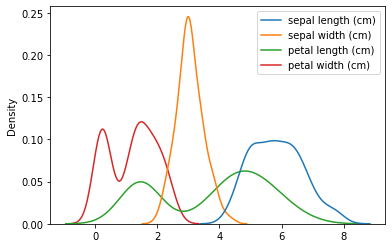

In [3]:
sns.kdeplot(data=iris_df)

Plotting the features against each other and checking frequency of feature in each range

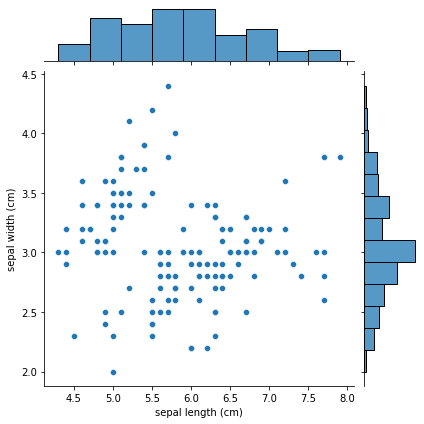

In [4]:
sns.jointplot(data=iris_df, x="sepal length (cm)", y="sepal width (cm)")

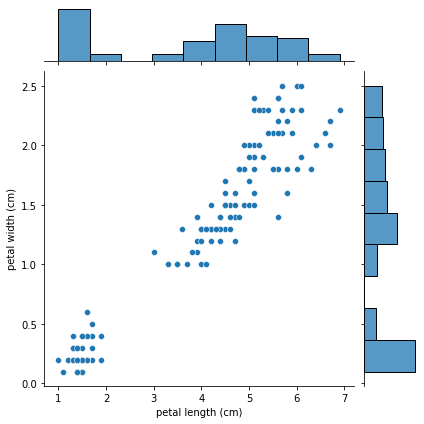

In [5]:
sns.jointplot(data=iris_df, x="petal length (cm)", y="petal width (cm)")

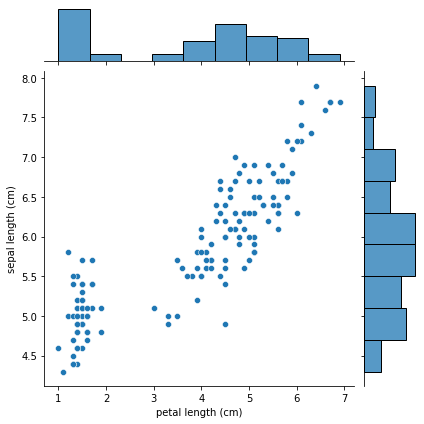

In [6]:
sns.jointplot(data=iris_df, x="petal length (cm)", y="sepal length (cm)")

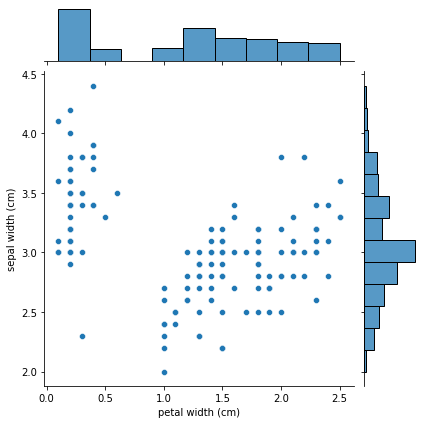

In [7]:
sns.jointplot(data=iris_df, x="petal width (cm)", y="sepal width (cm)")

Seeing the trend or relationship between various features

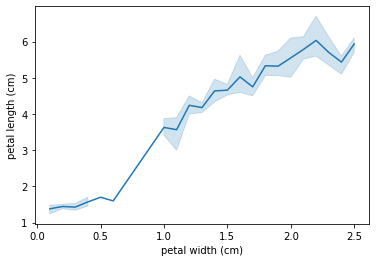

In [8]:
sns.lineplot(data=iris_df, x="petal width (cm)", y="petal length (cm)")

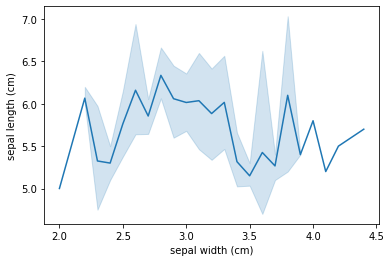

In [9]:
sns.lineplot(data=iris_df, x="sepal width (cm)", y="sepal length (cm)")

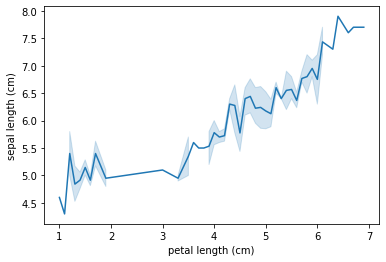

In [10]:
sns.lineplot(data=iris_df, x="petal length (cm)", y="sepal length (cm)")

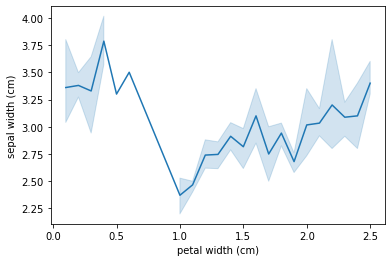

In [11]:
sns.lineplot(data=iris_df, x="petal width (cm)", y="sepal width (cm)")

Creating new features by multiplying length and width of each structure (Not actually a formula to calculate area of petal or sepal but an approximate)

In [12]:

iris_df['Petal area'] = iris_df['petal length (cm)'] * iris_df['petal width (cm)']
iris_df['Sepal area'] = iris_df['sepal length (cm)'] * iris_df['sepal width (cm)']

In [13]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Petal area,Sepal area
0,5.1,3.5,1.4,0.2,0.28,17.85
1,4.9,3.0,1.4,0.2,0.28,14.70
2,4.7,3.2,1.3,0.2,0.26,15.04
3,4.6,3.1,1.5,0.2,0.30,14.26
4,5.0,3.6,1.4,0.2,0.28,18.00


The plot below hints that formation of 3 clusters will be optimal

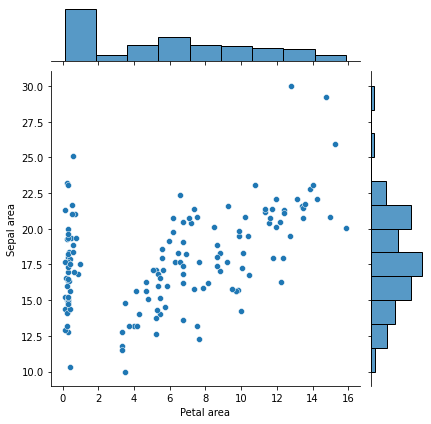

In [14]:
sns.jointplot(data=iris_df, x="Petal area", y="Sepal area")

In [15]:
#dropping the columns after eda
iris_df=iris_df.drop(['Petal area', 'Sepal area'],axis=1 )

**PREDICTING OPTIMUM CLUSTERS USING THE ELBOW METHOD**

The elbow method plots the sum of squared distances of samples to their closest cluster center for cluster range 1 to 10. The cluster number at which the WCSS doesnt reduce by much, will be the optimal cluster.

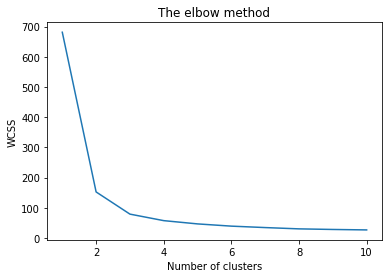

In [16]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris_df)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

We see that the elbow is formed at 3, therfore 3 is confirmed as the optimum number of cluster.

**APPLYING KMEANS TO THE DATASET**

In [17]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(iris_df)

Plotting features and coloring them as per predicted label

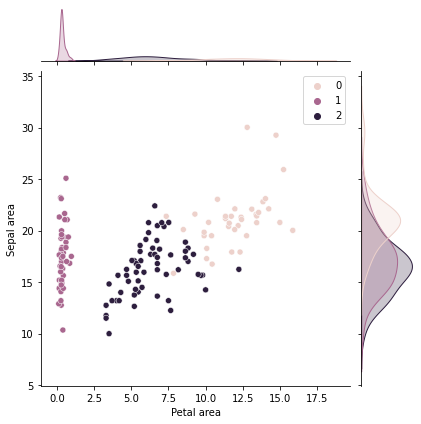

In [18]:
iris_df['Petal area'] = iris_df['petal length (cm)'] * iris_df['petal width (cm)']
iris_df['Sepal area'] = iris_df['sepal length (cm)'] * iris_df['sepal width (cm)']
sns.jointplot(data=iris_df, x="Petal area", y="Sepal area", hue=kmeans.labels_)


**VISUALIZING THE CLUSTERS AND THE CENTROIDS OF EACH CLUSTER ON THE FIRST 2 COLUMNS OF THE DATASET**

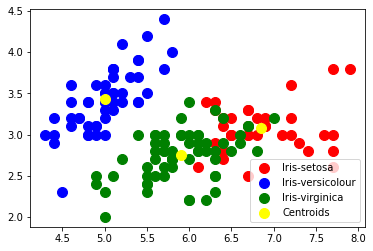

In [19]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
           s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

**RESULT**

Using EDA, we plot the features and come up with the hypothesis that 3 will be the optimum number of clusters which is then confirmed by the elbow method.